In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cdata.csv")
df

,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1
...,...,...,...
295,1.5798,1.9737,1
296,1.3918,2.5183,1
297,4.5359,0.4390,0
298,7.7911,0.3695,3


In [ ]:
#randomly select k points from minimum to maximum
D = np.array(df.iloc[:,:-1])
space = np.vstack((D.min(0),D.max(0)))
rang = space[1] - space[0]
def startpoint(k=4):
    #Create a list of initial centroid points of size k
    for i in range(k):
        yield np.random.random((2,))*rang + space[0]
startpts= startpoint()
list(startpts)

[array([ 7.53355091, -0.30241158]),
 array([1.50066426, 1.0978189 ]),
 array([-0.24333371, -2.29160494]),
 array([ 8.81069827, -1.80063416])]

In [ ]:
def distance(a,b):
    #Calculate the distance between a and b
    return  np.sqrt(sum((a-b)**2))
def get_centroid_point(x):
    #find the centroid point of a list
    x = np.array(x)
    return  np.mean(x)

In [ ]:
#read data
df = pd.read_csv("cdata.csv")
clus = df[["x","y"]]

def kmeans(data,k = 4):

    #first we set the label unknown because it's a unsupervise problem
    data["Label"]=None

    #randomly select k points from the data
    startpts = df.iloc[:,:-1].values
    np.random.shuffle(startpts)
    startpts = startpts[:k]

    labels= list(range(k))

    while True:
        sse = 0
        for i,v in data.iloc[:,:-1].iterrows():
            features = v.values
            #create a dictionay to gey the distance with three centroids dots
            dist = dict()
            for central,lbl in zip(startpts,labels):
                dist[lbl] = distance(features,central)
            #find the label of shortest distance
            min_distance_lbl = pd.Series(dist).idxmin()
            sse += pd.Series(dist).min()
            data.ix[i,"Label"] = min_distance_lbl
        means = data.groupby("Label").mean().values
        if np.array_equal(means,startpts):
            break
        else: startpts = means
        meanplot =  pd.DataFrame(means,columns=["x","y"])
        #ploting
        sns.lmplot(x="x",y="y",fit_reg=False,hue="Label",data=data)
kmeans(clus,4)

AttributeError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

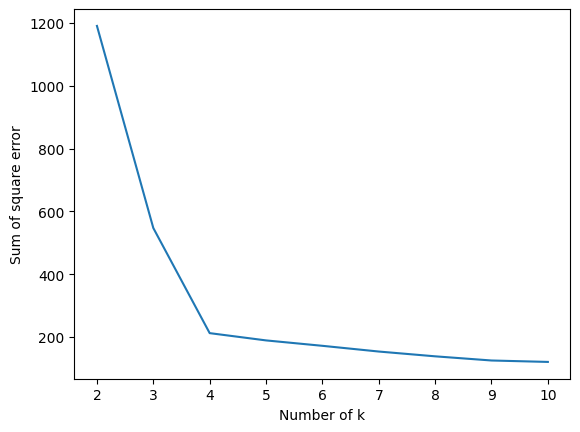

In [ ]:
features = df[["x","y"]].values
#elbow method
SSE = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='random')
    kmeans.fit(features)
    SSE.append(kmeans.inertia_)
plt.plot(range(2,11),SSE)
plt.xlabel("Number of k")
plt.ylabel("Sum of square error")
plt.savefig("elbow",dpi=500)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

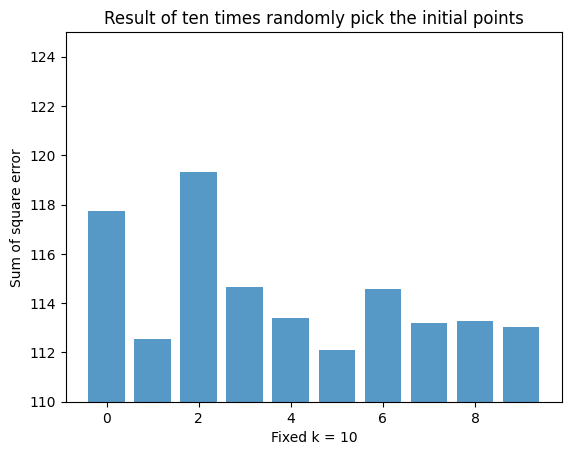

In [ ]:
# ten times
SSE = []
for i in range(10):
    kmeans = KMeans(n_clusters=10,init='random')
    kmeans.fit(features)
    SSE.append(kmeans.inertia_)
plt.bar(range(10),SSE,alpha=.75)
plt.xlabel("Fixed k = 10")
plt.ylabel("Sum of square error")
plt.title("Result of ten times randomly pick the initial points")
plt.ylim(110,125)
plt.savefig("ten",dpi=500)